In [1]:
import pandas as pd
import numpy as np

In [2]:
#function to calculate z-scores and sort the result

def calculate_z_score(df, df_rand):
    #calculate mean and standard deviation
    means = df_rand.mean(axis=1)
    std = df_rand.std(axis=1)

     # Add  new columns
    
    df_rand['mean'] = means
    df_rand['std'] = std
    df_rand['real data'] = df['Count']
    
    new_df = df_rand[['real data', 'mean', 'std']]
    
    #Make copies to avoid warnings
    new_df_copy = new_df.copy()
    
    
    # Calculate Z-scores 
    new_df_copy['z-score'] = (new_df_copy['real data'] - new_df_copy['mean']) / new_df_copy['std']
    
    
    sorted_df = new_df_copy.sort_values(by='z-score', ascending=False)
    
    # Replace infinite values in the "z-score" column with NaN
    sorted_df['z-score'].replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Drop rows with infinite values in the "z-score" column
    sorted_df.dropna(subset=['z-score'], how='any', inplace=True)

    return sorted_df    
    

In [28]:
# read the data 
df_snps_orig_psy = pd.read_csv('output/count_orig_psych_snp.txt', sep='\t', index_col=0)
df_snps_rand_psy = pd.read_csv('output/unique_psych_snps_from_binary.txt', sep='\t', index_col=0)
df_snps_orig_oth = pd.read_csv('output/count_orig_other_snp.txt', sep='\t', index_col=0)
df_snps_rand_oth = pd.read_csv('output/unique_other_snps_from_binary.txt', sep='\t', index_col=0)

df_eqtls_orig_psy = pd.read_csv('output/count_orig_psych_eqtl.txt', sep='\t', index_col=0)
df_eqtls_rand_psy = pd.read_csv('output/unique_psych_genes_from_binary.txt', sep='\t', index_col=0)
df_eqtls_orig_oth = pd.read_csv('output/count_orig_other_eqtl.txt', sep='\t', index_col=0)
df_eqtls_rand_oth = pd.read_csv('output/unique_other_eqtl_from_binary.txt', sep='\t', index_col=0)
# df_kegg_orig = pd.read_csv('count_original_data_kegg_pathways.csv', index_col=0)
# df_kegg_rand = pd.read_csv('unique_combos_kegg_pathways.csv', index_col=0)
# 
# df_wiki_orig = pd.read_csv('count_original_data_wikipathways.csv', index_col=0)
# df_wiki_rand = pd.read_csv('unique_combos_wikipathways.csv', index_col=0)



In [43]:
df_eqtls_rand_oth.head()

,1,2,3,4,5,6,7,8,9,10,mean,std,real data
"('sjogrens', 'lupus')",154,137,142,142,153,127,132,134,158,131,141.0,10.780641,191
"('sjogrens', 'biliary_chorrhosis')",178,179,192,183,194,180,181,209,173,188,185.7,10.456789,215
"('sjogrens', 'myasthenia')",35,33,26,40,39,36,31,29,35,44,34.8,5.370702,51
"('sjogrens', 'rh_arthritis')",189,189,204,192,189,211,182,188,192,197,193.3,8.538150,209
"('sjogrens', 'ms')",60,47,57,53,48,53,68,59,55,67,56.7,7.071853,79


In [59]:
df_genes_orig_all = pd.read_csv('output/count_orig_genes_all(2,3,4).txt', sep='\t', index_col=0)
df_genes_rand_all = pd.read_csv('output/unique_all_genes_from_binary(2,3,4).txt', sep='\t', index_col=0)

In [29]:
# Calculate the z-scores
z_snps_psy = calculate_z_score(df_snps_orig_psy, df_snps_rand_psy)
z_eqtls_psy = calculate_z_score(df_eqtls_orig_psy, df_eqtls_rand_psy)
z_snps_oth = calculate_z_score(df_snps_orig_oth, df_snps_rand_oth)
z_eqtls_oth = calculate_z_score(df_eqtls_orig_oth, df_eqtls_rand_oth)

# z_kegg = calculate_z_score(df_kegg_orig, df_kegg_rand)
# z_wiki = calculate_z_score(df_wiki_orig, df_wiki_rand)


In [60]:
z_genes_all = calculate_z_score(df_genes_orig_all, df_genes_rand_all)

In [61]:
print(z_genes_all.head(20))

                                             real data  mean       std  \
('ASD', 'BILIARY', 'LUPUS', 'PARKINSONS')          106   0.1  0.316228   
('ASD', 'AUD', 'LUPUS', 'PARKINSONS')              106   0.1  0.316228   
('ASD', 'LUPUS', 'PARKINSONS', 'SCZ')              106   0.1  0.316228   
('ASD', 'AUD', 'BILIARY', 'PARKINSONS')            113   0.2  0.421637   
('ASD', 'BILIARY', 'PARKINSONS', 'SCZ')            113   0.2  0.421637   
('ASD', 'LUPUS', 'PARKINSONS')                     106   0.3  0.483046   
('ARTHRITIS', 'FATIGUE', 'MDD', 'SJOGRENS')         57   0.1  0.316228   
('ARTHRITIS', 'BPD', 'GOUT', 'SJOGRENS')            57   0.1  0.316228   
('ARTHRITIS', 'FATIGUE', 'GOUT')                    57   0.1  0.316228   
('BILIARY', 'GOUT', 'MDD', 'SJOGRENS')              57   0.1  0.316228   
('BILIARY', 'BPD', 'FATIGUE', 'SJOGRENS')           57   0.1  0.316228   
('BPD', 'FATIGUE', 'GOUT')                          57   0.1  0.316228   
('ARTHRITIS', 'FATIGUE', 'GOUT', 'SCZ'

In [12]:
#function to count number of combos that are above a given threshold together with a given number of genes
def count_combos_above_threshold(df, threshold, genes):
    return len(df[(df['z-score'] >= threshold) & (df[['real data']] >= genes).all(axis=1)])

4468


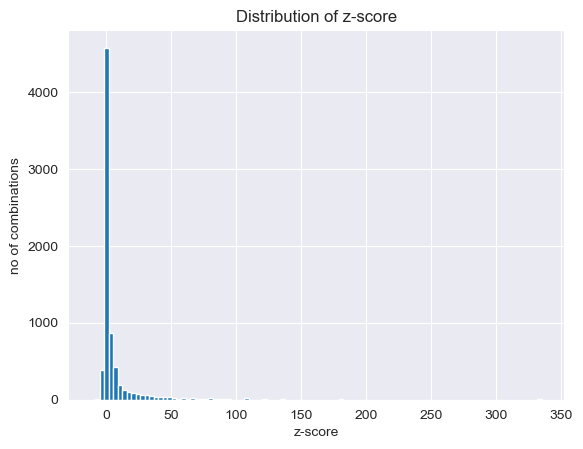

In [62]:
from matplotlib import pyplot as plt
z = z_genes_all['z-score']
plt.hist(z, bins=100)
plt.title('Distribution of z-score')
plt.xlabel('z-score')
plt.ylabel('no of combinations')
plt.show()

In [28]:
print(count_combos_above_threshold(z_snps_psy, 2, 5))
print(count_combos_above_threshold(z_snps_psy, 3, 5))
print(count_combos_above_threshold(z_eqtls_psy, 2, 5))
print(count_combos_above_threshold(z_eqtls_psy, 3, 5))
print(count_combos_above_threshold(z_snps_oth, 2, 5))
print(count_combos_above_threshold(z_snps_oth, 3, 5))
print(count_combos_above_threshold(z_eqtls_oth, 2, 5))
print(count_combos_above_threshold(z_snps_oth, 3, 5))

11
10
108
95
50
48
229
48


In [63]:
print(count_combos_above_threshold(z_genes_all, 2, 5))
print(count_combos_above_threshold(z_genes_all, 3, 5))

1787
1679
